<a href="https://colab.research.google.com/github/1337Rinz/KhaiPhaDuLieuLon/blob/main/DoAn_KhaiPhaDuLieuLon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
# source DATA https://www.kaggle.com/datasets/imkrkannan/lung-cancer-dataset-by-staceyinrobert
# Lê Tuấn Kiệt

#Tiền xử lý + Trực quan hoá



In [192]:
import numpy as np
import pandas as pd

In [193]:
# load data
data = pd.read_csv('https://raw.githubusercontent.com/1337Rinz/KhaiPhaDuLieuLon/main/survey_lung_cancer.csv')

# print data.shape
print('data shape: ',data.shape)

# show 5 dòng đầu 
data.head(5)

data shape:  (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [194]:
# view summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

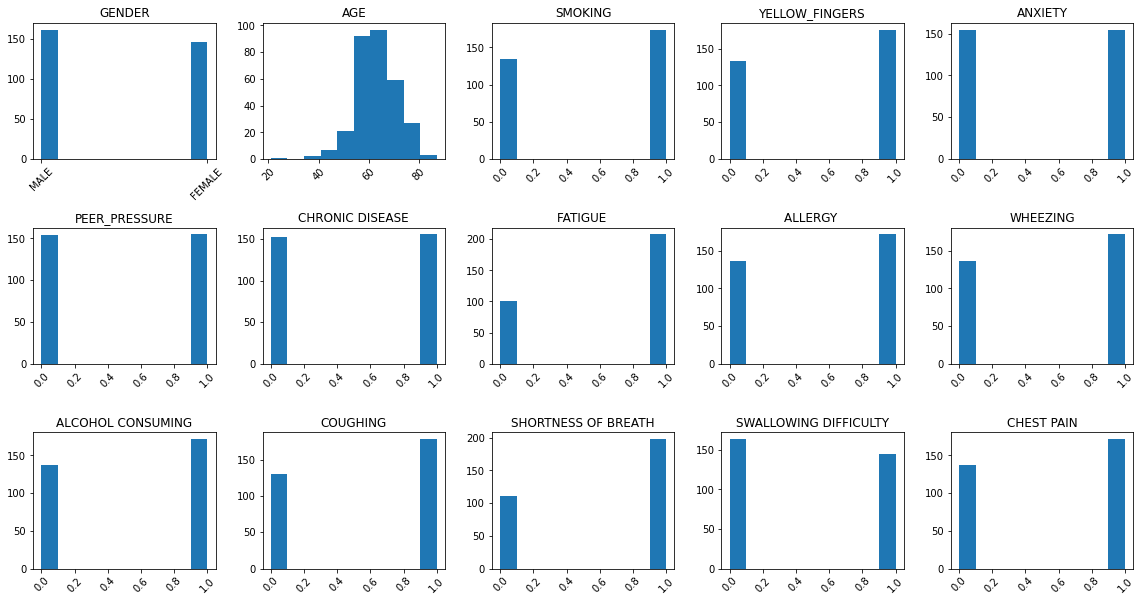

In [195]:
# Trực quan hoá 15 feature

import matplotlib.pyplot as plt


cols = list(data.columns)
cols_data=cols[:-1]

plt.figure(figsize=(16,28))
for i in range(len(cols_data)):
    plt.subplot(10,5,i+1)
    plt.title(cols_data[i])
    plt.xticks(rotation=45)
    plt.hist(data[cols_data[i]])
    
plt.tight_layout()

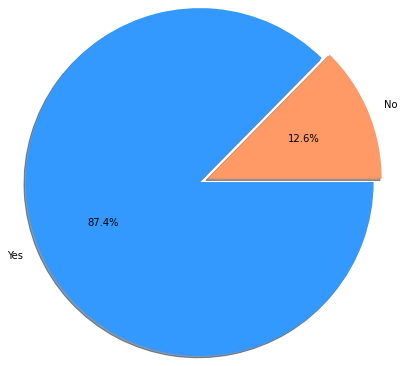

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


In [196]:
# Trực quan hoá cột LUNG_CANCER = pie char

pie_df=pd.DataFrame(data.groupby('LUNG_CANCER')['LUNG_CANCER'].count())

colors = ['#ff9966','#3399ff']
plt.pie(pie_df['LUNG_CANCER'],labels=['No','Yes'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)

plt.show()

print(data["LUNG_CANCER"].value_counts())

In [197]:
# ktra có dữ liệu khuyết không
# False = không có dữ liệu bị khuyết

nullValuesCheck = "Data không có dữ liệu khuyết" if data.isnull().values.any() == False else "Data có dữ liệu khuyết"

print(nullValuesCheck)
print("Data shape: ",data.shape)

Data không có dữ liệu khuyết
Data shape:  (309, 16)


In [198]:
# kiểm trùng và loại bỏ

data.drop_duplicates(inplace=True)
print("Data shape sau khi loại bỏ data trùng lặp: ",data.shape)     

Data shape sau khi loại bỏ data trùng lặp:  (276, 16)


In [199]:
# Số hoá các giá trị cột GENDER và cột LUNG_CANCER 

data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x=='MALE' else 0)
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x=='YES' else 0)
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


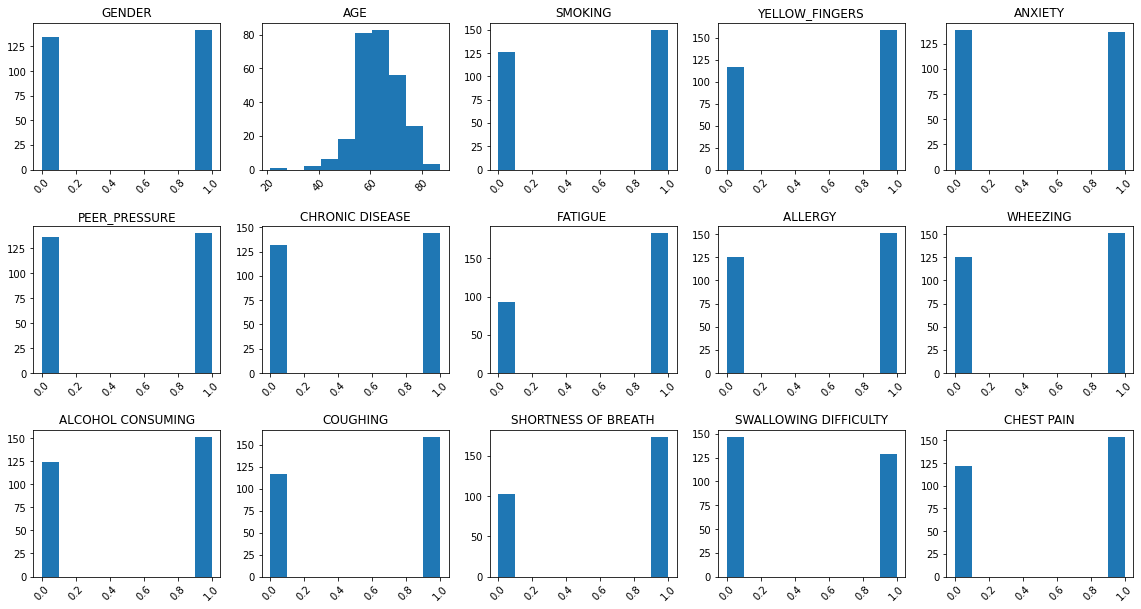

In [200]:
# Trực quan hoá 15 feature sau khi đã tiền xử lý

import matplotlib.pyplot as plt

cols = list(data.columns)
cols_data=cols[:-1]

# khởi tạo figure(nền trắng chứa toàn bộ plot con)
plt.figure(figsize=(16,28))

for i in range(len(cols_data)):
    plt.subplot(10,5,i+1)         #plot con
    plt.title(cols_data[i])       #title tên cột
    plt.xticks(rotation=45)       
    plt.hist(data[cols_data[i]])  #Histogram(Biều đồ)
    
plt.tight_layout()

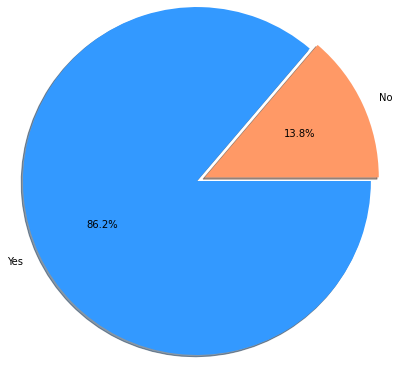

1    238
0     38
Name: LUNG_CANCER, dtype: int64


In [201]:
# Trực quan hoá cột LUNG_CANCER = pie char sau khi đã tiền xử lý

pie_df=pd.DataFrame(data.groupby('LUNG_CANCER')['LUNG_CANCER'].count())

colors = ['#ff9966','#3399ff']
plt.pie(pie_df['LUNG_CANCER'],labels=['No','Yes'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)

plt.show()

print(data["LUNG_CANCER"].value_counts())

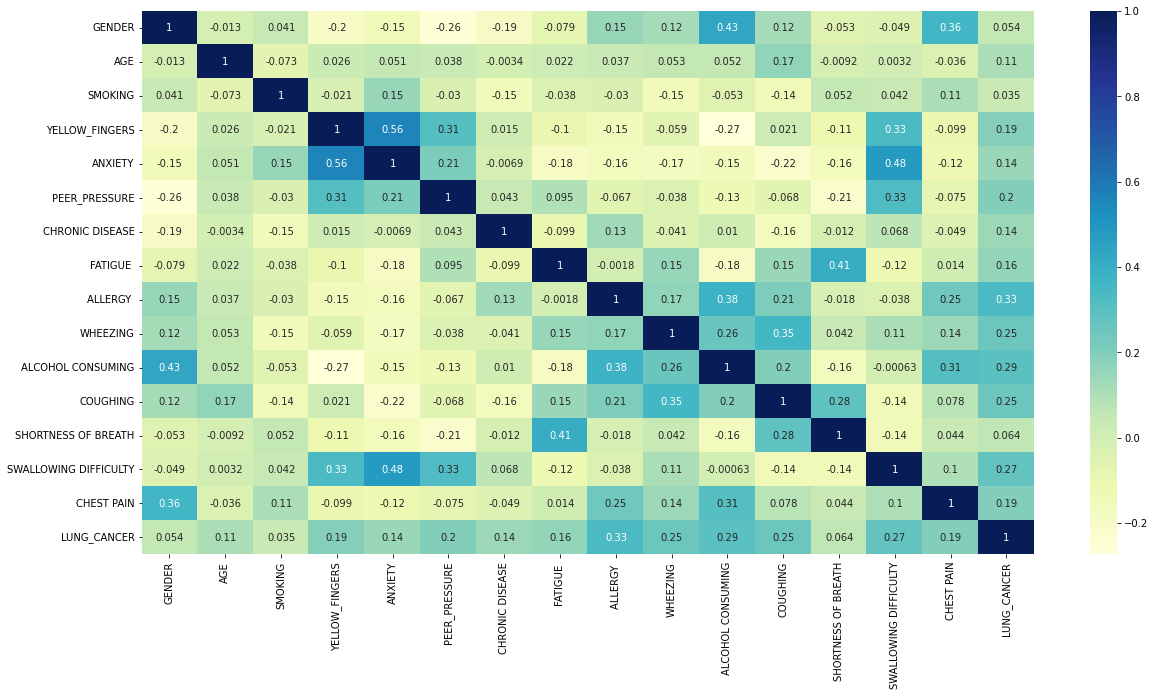

In [226]:
import seaborn as sns

# khởi tạo figure
plt.figure(figsize=(20,10))
# Ma trận tương quan bằng heatmap (plot Correlation Matrix)
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')

#MODEL


In [203]:
# select 15 cột Features for x ; cột LUNG_CANCER for y
# data.iloc[<row selection>,<column selection>]

# data Features
x = data.iloc[ :,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
# data Labels
y = data["LUNG_CANCER"].values
data.shape

(276, 16)

In [204]:
from sklearn.model_selection import train_test_split
'''
random state là siêu tham số (hyperparameter) được sử dụng để thiết lập seed cho trình tạo ngẫu nhiên (random generator). 
Do bản chất của việc tách (split) dữ liệu thành tập dữ liêu huấn luyện (traning data) và tập dữ liệu thử nghiệm (testing set) là ngẫu nhiên, 
bạn sẽ nhận được các dữ liệu khác nhau được gán cho tập dữ liệu huấn luyện và tập dữ liệu thử nghiệm trừ khi bạn có thể kiểm soát yếu tố ngẫu nhiên.
'''
# chia tập train:test = 70:30 ; thiết lập random_state seed 
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.3 , random_state=19)
print('X_train shape: ', X_train.shape)
print('X_test shape : ', X_test.shape)

X_train shape:  (193, 15)
X_test shape :  (83, 15)


In [205]:
print('y_train shape: ',y_train.shape)
print('y_test shape : ', y_test.shape)

y_train shape:  (193,)
y_test shape :  (83,)


In [206]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# naive bayes trên tập train
model = GaussianNB()

# Train model trên tập training sets
model.fit(X_train, y_train)

# Predict for Test_Set
y_pred  = model.predict(X_test)

In [207]:
# model.fit(X_train, y_train)
print(model.predict(X_test))
print(len(model.predict(X_test)))

[0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1]
83


In [208]:
# accurate của mô hình
print("accuracy = " ,accuracy_score(y_test, model.predict(X_test)))

score_4 = accuracy_score(y_test, model.predict(X_test))

accuracy =  0.9036144578313253


In [209]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9171
Test set score: 0.9036


In [210]:
# Evaluating Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

# Model Accuracy
model_predict = model.predict(X_test)
print('accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, model_predict)))
accuracy_score = (metrics.accuracy_score(y_test, model_predict))

accuracy: 0.90


In [211]:
# Applying 6-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 6, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.93939394 0.875      0.875      0.9375     0.90625    0.96875   ]


In [212]:
# Confusion_matrix
# True positive (TP) ; False positive (FP)
# False negative (FN); True negative (TN)

print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

[[70  4]
 [ 4  5]]


In [213]:
# Báo cáo
print('\nClassification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))


Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        74
           0       0.56      0.56      0.56         9

    accuracy                           0.90        83
   macro avg       0.75      0.75      0.75        83
weighted avg       0.90      0.90      0.90        83




*   Precision = (TP/(TP+FP)
*   Recall    = (TP/(TP+FN)
*   F1 Score  = (2/((Precision^-1)+(Recall^-1))




In [214]:
# new input
GENDER= 1
AGE= 69
SMOKING = 0
YELLOW_FINGERS = 1
ANXIETY = 1
PEER_PRESSURE = 0
CHRONIC_DISEASE = 0
FATIGUE =1
ALLERGY= 0
WHEEZING = 1
ALCOHOL_CONSUMING = 1
COUGHING = 1
SHORTNESS_OF_BREATH = 1
SWALLOWING_DIFFICULTY = 1
CHEST_PAIN =1


In [ ]:
# input

GENDER                =int(input("Nhập giới tính [MALE: 1 / FEMALE: 0]: "))
AGE                   =int(input("Nhập tuổi [20-90]: "))
SMOKING               =int(input("Có hút thuốc không [Có: 1 / Không: 0]: "))
YELLOW_FINGERS        =int(input("Có bị vàng da ở ngón tay không [Có: 1 / Không: 0]: "))
ANXIETY               =int(input("Có hội chứng rối loạn lo âu không [Có: 1 / Không: 0]: "))
PEER_PRESSURE         =int(input("Có bị áp lực không [Có: 1 / Không: 0]: "))
CHRONIC_DISEASE       =int(input("Có bị mắc bệnh mãn tính không [Có: 1 / Không: 0]: "))
FATIGUE               =int(input("Có cảm thấy mệt mỏi không [Có: 1 / Không: 0]: "))
ALLERGY               =int(input("Có dị ứng gì không [Có: 1 / Không: 0]: "))
WHEEZING              =int(input("Có triệu chứng ran rít (Khò khè) không [Có: 1 / Không: 0]: "))
ALCOHOL_CONSUMING     =int(input("Có sử dụng đồ uống cồn không [Có: 1 / Không: 0]: "))
COUGHING              =int(input("Có ho không [Có: 1 / Không: 0]: "))
SHORTNESS_OF_BREATH   =int(input("Có khó thở không [Có: 1 / Không: 0]: "))
SWALLOWING_DIFFICULTY =int(input("Có khó nuối không [Có: 1 / Không: 0]: "))
CHEST_PAIN            =int(input("Có tức ngực không [Có: 1 / Không: 0]: "))


In [217]:
model_predict = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]
model_pred =model.predict(model_predict)

if model_pred == 1:
    result = "Có dấu hiệu bị ung thư phổi"
elif model_pred == 0 :
    result = "Không có dấu hiệu bị ung thư phổi"
else :
    result = "error "

print("Dựa trên thông tin trên. Với độ chính xác của {:.2f} ta có dự đoán:\n >> {}".format((accuracy_score),result))

Dựa trên thông tin trên. Với độ chính xác của 0.90 ta có dự đoán:
 >> Có dấu hiệu bị ung thư phổi


#So sánh các thuật toán khác



In [218]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

list_scores=[]
list_models=[]

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)
score_1=accuracy_score(y_test,pred_1)
list_models.append('logisticregression')
list_scores.append(score_1)

score_1
     

0.927710843373494

In [219]:
# Applying 6-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv = 6, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.90909091 0.875      0.84375    0.9375     0.875      0.96875   ]


In [220]:
# Support vector machine

from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
pred_2=svm.predict(X_test)
score_2=accuracy_score(y_test,pred_2)
list_scores.append(score_2)
list_models.append('svm')

score_2
     

0.891566265060241

In [221]:
# Applying 6-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X_train, y_train, cv = 6, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84848485 0.875      0.84375    0.84375    0.84375    0.84375   ]


In [222]:
# randomforest classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_3=rfc.predict(X_test)
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('randomforest classifier')
score_3
     

0.9397590361445783

In [223]:
# Applying 6-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, y_train, cv = 6, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84848485 0.875      0.78125    0.9375     0.90625    0.875     ]


In [224]:
list_scores.append(score_4)
list_models.append('naive bayes')

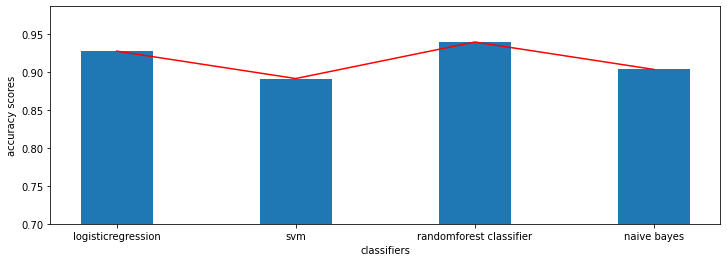


ĐỘ CHÍNH XÁC CỦA CÁC THUẬT TOÁN 
logisticregression :		 0.93
svm :		 0.89
randomforest classifier :		 0.94
naive bayes :		 0.9


In [225]:
# PLOT
plt.figure(figsize=(12,4))
plt.bar(list_models,list_scores,width=0.4)
plt.plot(list_models,list_scores,'r')
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.ylim(bottom=0.7)

plt.show()

print('\nĐỘ CHÍNH XÁC CỦA CÁC THUẬT TOÁN ')
for i in range(len(list_models)):
  tmp_Score = list_scores[i]
  print(list_models[i],":\t\t",round(tmp_Score,2))